## extract data from zipfile

In [236]:
import tarfile
import zipfile
import os

DATA_ROOT_PATH = './datasets/titanic'
FILENAME = 'titanic.zip'
FILEPATH = os.path.join(DATA_ROOT_PATH, FILENAME)

DESNAME = 'datasets'
DESPATH = os.path.join(DATA_ROOT_PATH, DESNAME)

# tarfile_ref = tarfile.open(FILEPATH)
# tarfile_ref.extractall(DATAPATH)
# tarfile_ref.close()

print(FILEPATH)
print(os.listdir(DATA_ROOT_PATH))

zipfile_ref = zipfile.ZipFile(FILEPATH)
zipfile_ref.extractall(DESPATH)
zipfile_ref.close()

./datasets/titanic/titanic.zip
['datasets', 'titanic.zip']


## Import data from csv to pandas or numpy

In [311]:
import pandas as pd
import numpy as np

DATA_ROOT_PATH = './datasets/titanic/datasets'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

TRAIN_FILEPATH = os.path.join(DATA_ROOT_PATH, TRAIN_FILENAME)
TEST_FILEPATH = os.path.join(DATA_ROOT_PATH, TEST_FILENAME)

train_df = pd.read_csv(TRAIN_FILEPATH)
test_df = pd.read_csv(TEST_FILEPATH)

## Visualize the input

In [238]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [239]:
cat_columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
not_useful = ['Ticket', 'PassengerId', 'Survived', 'Cabin']
selected_cat_columns = ['Name', 'Sex', 'Pclass', 'Embarked']
selected_num_columns = ['Age', 'Fare', 'SibSp', 'Parch']

In [240]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


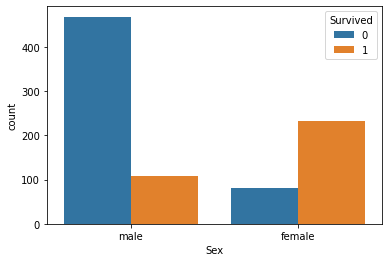

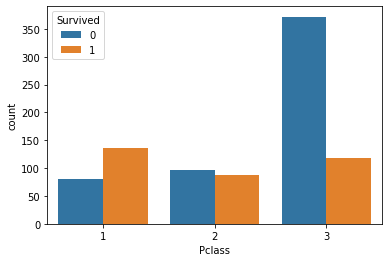

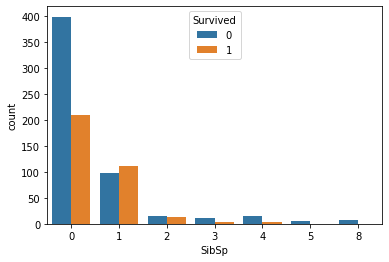

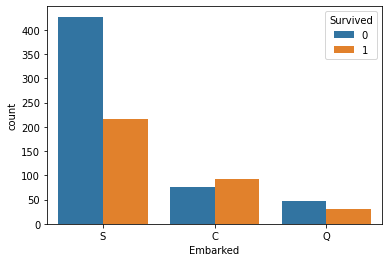

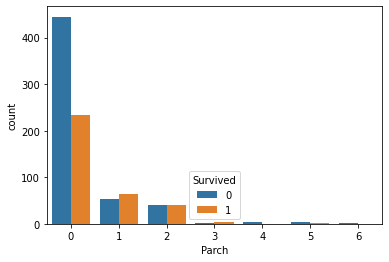

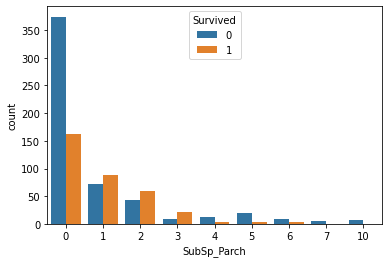

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data = train_df)
plt.show()
sns.countplot(x='Pclass', hue='Survived', data = train_df)
plt.show()
sns.countplot(x='SibSp', hue='Survived', data = train_df)
plt.show()
sns.countplot(x='Embarked', hue='Survived', data = train_df)
plt.show()
sns.countplot(x='Parch', hue='Survived', data = train_df)
plt.show()

train_agg_SubSpParch_df = train_df.copy()
train_agg_SubSpParch_df['SubSp_Parch'] = train_df['SibSp'] + train_df['Parch']

sns.countplot(x='SubSp_Parch', hue='Survived', data = train_agg_SubSpParch_df)
plt.show()

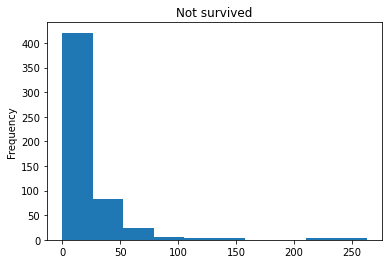

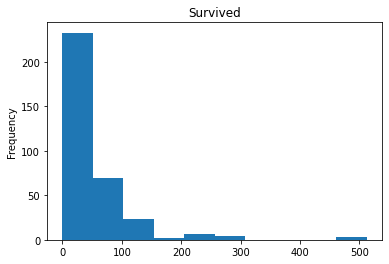

not survived mean 10.5
survived mean 26.0


In [242]:
train_df['Fare'].loc[train_df['Survived'] == 0].plot.hist(bins = 10)
plt.title('Not survived')
plt.show()
train_df['Fare'].loc[train_df['Survived'] == 1].plot.hist(bins = 10)
plt.title('Survived')
plt.show()

print(f"not survived mean {train_df['Fare'].loc[train_df['Survived'] == 0].median()}")
print(f"survived mean {train_df['Fare'].loc[train_df['Survived'] == 1].median()}")

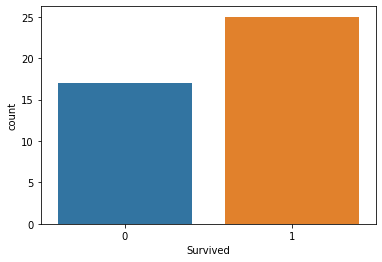

In [243]:
# selecgt the high status prefix and observe survived rate
focused_prefix = ['Master', 'Lady', 'Countess']
focused_idx = np.zeros((len(train_df),)).astype('bool')

for prefix in focused_prefix:
    focused_idx = np.logical_or(focused_idx, train_df['Name'].str.contains(prefix))

sns.countplot(x='Survived', data = train_df.loc[focused_idx])
plt.show()

In [244]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Begin testing data cleaning

In [245]:
from sklearn.impute import SimpleImputer, MissingIndicator

In [246]:
median_imputer = SimpleImputer(strategy='median')
mostfreq_imputer = SimpleImputer(strategy='most_frequent')

# test fill num with median
train_imputed_df = train_df.copy()
train_imputed_num_df = train_imputed_df[selected_num_columns]
median_imputed = median_imputer.fit_transform(train_imputed_num_df)

In [247]:
print(np.isnan(median_imputed[:, 0]).any())
print(np.isnan(train_df['Age']).any())

False
True


In [248]:
# test fill cat with most frequent
train_imputed_df = train_df.copy()
train_imputed_cat_df = train_imputed_df[selected_cat_columns]
test = mostfreq_imputer.fit_transform(train_imputed_cat_df)

In [249]:
print(test[:,3])
print(train_df['Embarked'].isnull().any())
test2 = np.copy(train_df['Embarked'])
print(test2)

['S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'C' 'Q' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'Q' 'S' 'Q' 'Q' 'C' 'S' 'S' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'C' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'Q' 'S'
 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'S' 'S' 'Q' 'C'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'C' 'Q' 'S

## Create custom pipeline  
For filter high_status name and group sibsp parch

In [250]:
from sklearn.base import BaseEstimator, TransformerMixin

In [251]:
class CatFeatureCombinor(BaseEstimator, TransformerMixin):
    def __init__(self, name_idx = 0, subsp_idx = 3, parch_idx = 5, 
    high_stat_list=['Master', 'Lady', 'Countess']):
        self.high_stat_list = high_stat_list
        self.name_idx = name_idx
        self.subsp_idx = subsp_idx
        self.parch_idx = parch_idx
        return None

    def fit(self, X, y=None):
        # take input as pandas, also return as pandas
        return self

    def transform(self, X):
        # take input as pandas, also return as pandas
        X_copy = X.copy()
        focused_idx = np.zeros((len(X_copy),)).astype('bool')
        name_df = pd.Series(X_copy[:, self.name_idx])

        for prefix in self.high_stat_list:
            focused_idx = np.logical_or(focused_idx, name_df.str.contains(prefix))
        
        X_copy = np.c_[X_copy, focused_idx.astype('int')]
        X_copy = np.delete(X_copy, 0, 1)

        return X_copy

class NumFeatureCombinor(BaseEstimator, TransformerMixin):
    def __init__(self, group_parch = True, subsp_idx =2, parch_idx = 3):
        self.group_parch = group_parch

    def fit(self, X, y = None):
        return self

    def transform(self, X):

        X_copy = np.copy(X)
        if self.group_parch:
            X_copy = np.c_[X_copy, X_copy[:, 2] + X_copy[:, 3]]
            X_copy = np.delete(X_copy, [2, 3], 1)

        return X_copy

In [252]:
## Test feature combinor

featureCombinor = CatFeatureCombinor()
mostfreq_imputer = SimpleImputer(strategy='most_frequent')
train_df[selected_cat_columns].info()
test2 = featureCombinor.fit_transform(mostfreq_imputer.fit_transform(train_df[selected_cat_columns]))
# print(test2[:20, [2, 4, -1]])

## final cat columns
final_cat_columns = ['Sex', 'Pclass', 'Embarked', 'SocialStat']
print(test2[:, [3]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Pclass    891 non-null    int64 
 3   Embarked  889 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.0+ KB
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [

In [253]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('combinor', NumFeatureCombinor()),
    ('scaler', StandardScaler())
])

num_pipeline_columns = ['Age', 'Fare', 'SubSp_Parch']

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('combinor',FeatureCombinor()),
    ('oh_encoder', OneHotEncoder(drop='if_binary'))
])

cat_pipeline_columns = ['Sex', 'Pclass1', 'Pclass2', 'Pclass3', 'Embarked1', 'Embarked2', 'Embarked3', 'SocialStat']

num_cat_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_columns),
    ('cat', cat_pipeline, selected_cat_columns)
])

num_cat_pipieline_columns = num_pipeline_columns + cat_pipeline_columns

In [254]:
## test cat pipeline

cat_pipeline.fit(train_df[selected_cat_columns])
test = cat_pipeline.transform(train_df[selected_cat_columns])

cat_pipeline.named_steps['oh_encoder'].categories_

[array(['female', 'male'], dtype=object),
 array([1, 2, 3], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([0, 1], dtype=object)]

In [255]:
## test num pipeline
num_train_df = train_df[selected_num_columns].copy()

num_train_df.info()
test = num_pipeline.fit_transform(num_train_df)
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Fare    891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB
(891, 3)


In [256]:
## test full pipeline

test = num_cat_pipeline.fit_transform(train_df)

## Train sample ml model

In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

In [258]:
train_dataset_df = train_df.drop(columns = 'Survived')
train_dataset_prep = num_cat_pipeline.fit_transform(train_dataset_df)
train_label = np.copy(train_df['Survived'])

In [280]:
rndf_clf = RandomForestClassifier(random_state=2)

rndf_score_cv = cross_val_score(rndf_clf, train_dataset_prep, train_label, cv = 5)
print(rndf_score_cv)
print(rndf_score_cv.mean())

# train to get feature importances
rndf_clf.fit(train_dataset_prep, train_label)
feature_importances = rndf_clf.feature_importances_

[0.77653631 0.78651685 0.84269663 0.78651685 0.81460674]
0.8013746783001695


In [264]:
svc_clf = SVC(random_state=2)

svc_score_cv = cross_val_score(svc_clf, train_dataset_prep, train_label, cv = 5)
print(svc_score_cv)
print(svc_score_cv.mean())

[0.83240223 0.8258427  0.80337079 0.80898876 0.87640449]
0.8294017952419811


In [270]:
lin_clf = LogisticRegression(random_state =2)

lin_score_cv = cross_val_score(lin_clf, train_dataset_prep, train_label, cv = 5)
print(lin_score_cv)
print(lin_score_cv.mean())

[0.83240223 0.8258427  0.80337079 0.80337079 0.85955056]
0.8249074132195091


In [278]:
svc_clf.C

1.0

In [281]:
for weight, column in sorted(zip(rndf_clf.feature_importances_, num_cat_pipieline_columns), reverse = True):
    print((weight, column))

(0.2718565905650503, 'Sex')
(0.2525648200688229, 'Fare')
(0.2505736144896906, 'Age')
(0.07116221385066901, 'SubSp_Parch')
(0.060398644545210024, 'Pclass3')
(0.03040172641501462, 'Pclass1')
(0.017609458546897067, 'SocialStat')
(0.015114091649656282, 'Pclass2')
(0.012755543496691814, 'Embarked3')
(0.011145028226231186, 'Embarked1')
(0.006418268146066029, 'Embarked2')


In [261]:
print(score_cv.mean())

0.8013746783001695


## Create another custom transformer to select feature importance and search appropriate hyper parameter

In [282]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        return None

    def fit(self, X, y = None):

        selected_idx = np.argpartition(self.feature_importances, -self.k)[-self.k:]
        self.selected_idx = selected_idx

        return self

    def transform(self, X, y = None):

        X_copy = np.copy(X)
        return X_copy[:, self.selected_idx]

In [296]:
full_pipe_w_selector = Pipeline([
    ('preprocess', num_cat_pipeline),
    ('feature_selector', FeatureSelector(feature_importances, k = 9))
])

full_pipe_w_selector_predictor = Pipeline([
    ('preprocess', num_cat_pipeline),
    ('feature_selector', FeatureSelector(feature_importances, k = 9)),
    ('estimator', SVC(random_state = 42))
])

In [297]:
full_pipe_w_selector_predictor.fit(train_dataset_df, train_label)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('combinor',
                                                                   NumFeatureCombinor(parch_idx=None,
                                                                                      subsp_idx=None)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
          

In [307]:
# grid search cv to find the appropriate hyper param
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'estimator__C': uniform(0.1, 10),
    'estimator__kernel':['sigmoid', 'rbf'],
    'estimator__gamma':['scale', 'auto'],
    'feature_selector__k': randint(1, 11)
    }

randomSearchCV = RandomizedSearchCV(full_pipe_w_selector_predictor, param_distributions, cv = 5, random_state = 42)

In [308]:
randomSearchCV.fit(train_dataset_df, train_label)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('combinor',
                                                                                                NumFeatureCombinor(parch_idx=None,
                                                                                                                   subsp_idx=None)),
                                                                                               ('scaler',
                                                                                                StandardScaler())

In [310]:
randomSearchCV.best_score_

0.8327663046889711

## Predict test set!

In [315]:
test_df.info()
train_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name    

In [317]:
test_pred = randomSearchCV.best_estimator_.predict(test_df)

In [318]:
import csv

DATA_ROOT_PATH = './datasets/titanic'
RESULT_FILENAME = 'submissions.csv'
RESULT_FILEPATH = os.path.join(DATA_ROOT_PATH, RESULT_FILENAME)

with open(RESULT_FILEPATH, 'w') as f:
    writer = csv.writer(f)

    writer.writerow(['PassengerId','Survived'])

    for passengerId, survived in zip(test_df['PassengerId'], test_pred):
        writer.writerow([passengerId, survived])